In [114]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [115]:
acertos = []
for i in range (0,30):
    acertoG1 = 10
    while(acertoG1>1 or acertoG1<0):
        acertoG1 = np.random.normal(loc=0.8, scale=0.5)
    acertos.append(acertoG1)    

In [116]:
for i in range (0,30):
    acertoG2 = 10
    while(acertoG2>1 or acertoG2<0):
        acertoG2 = np.random.normal(loc=0.6, scale=0.5)
    acertos.append(acertoG2)    

In [117]:
for i in range (0,30):
    acertoG3 = 10
    while(acertoG3>1 or acertoG3<0):
        acertoG3 = np.random.normal(loc=0.4, scale=0.5)
    acertos.append(acertoG3)    

In [118]:
for i in range (0,30):
    acertoG4 = 10
    while(acertoG4>1 or acertoG4<0):
        acertoG4 = np.random.normal(loc=0.2, scale=0.5)
    acertos.append(acertoG4)    

In [119]:
tempos = []
for i in range (0,30):
    tempoG1 = -10
    while(tempoG1<0):
        tempoG1 = np.random.normal(loc=10, scale=4)
    tempos.append(tempoG1)

In [120]:
for i in range (0,30):
    tempoG2 = -10
    while(tempoG2<0):
        tempoG2 = np.random.normal(loc=30, scale=7)
    tempos.append(tempoG2)

In [121]:
for i in range (0,30):
    tempoG3 = -10
    while(tempoG3<0):
        tempoG3 = np.random.normal(loc=30, scale=7)
    tempos.append(tempoG3)

In [122]:
for i in range (0,30):
    tempoG4 = -10
    while(tempoG4<0):
        tempoG4 = np.random.normal(loc=100, scale=20)
    tempos.append(tempoG4)

In [123]:
df_questoes = pd.DataFrame(data = {'Acerto Medio':acertos,'Tempo Medio':tempos})

Text(0.5,0.98,'Acerto e Tempo dos Exercicios')

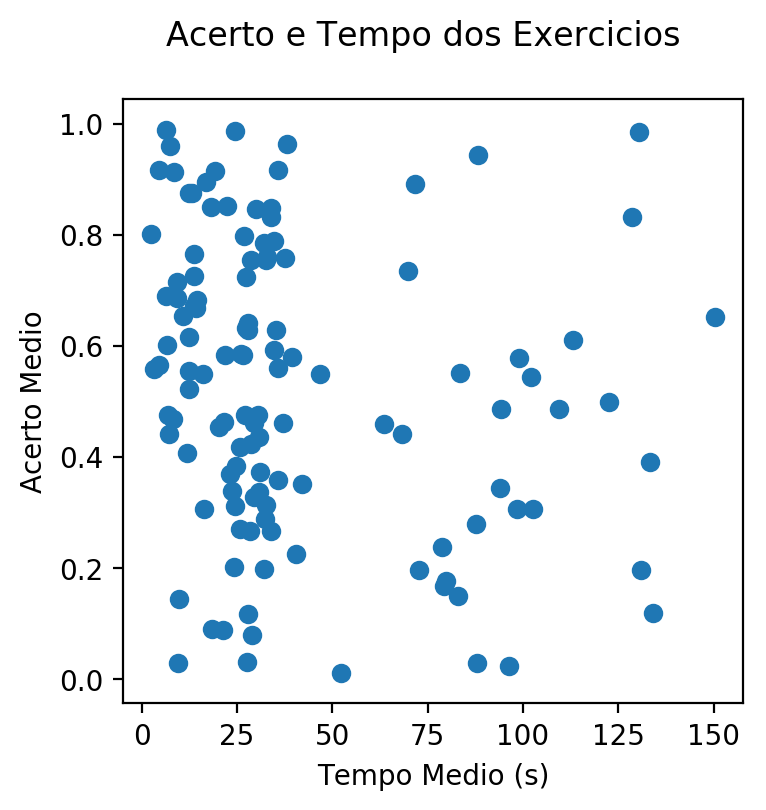

In [124]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 200)
ax.scatter(df_questoes['Tempo Medio'], df_questoes['Acerto Medio'])
ax.set_xlabel('Tempo Medio (s)')
ax.set_ylabel('Acerto Medio')
fig.suptitle('Acerto e Tempo dos Exercicios')

In [125]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=6).fit(df_questoes)

In [126]:
df_questoes['Grupo'] = kmeans.predict(df_questoes).tolist()

In [127]:
np.transpose(kmeans.cluster_centers_)[0]

array([0.63622068, 0.41138908, 0.4748887 , 0.52505798, 0.40056918,
       0.55588581])

Text(0.5,0.98,'Kmeans sem padronizacao')

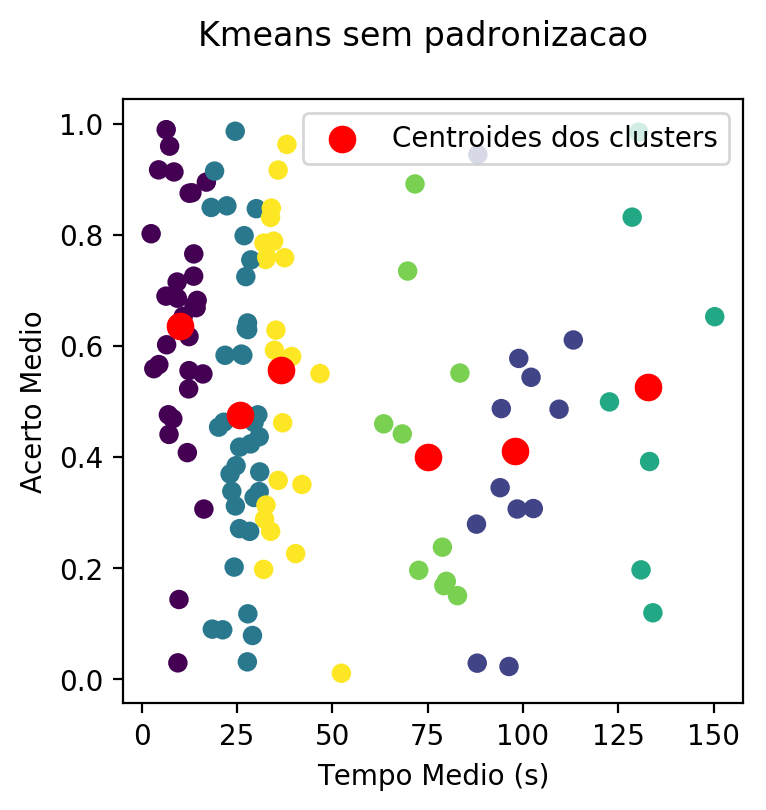

In [131]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 200)
ax.scatter(df_questoes['Tempo Medio'], df_questoes['Acerto Medio'], c=df_questoes['Grupo'], label='_nolegend_')
ax.scatter(np.transpose(kmeans.cluster_centers_)[1],np.transpose(kmeans.cluster_centers_)[0], c='r', s=80, label = 'Centroides dos clusters')
ax.set_xlabel('Tempo Medio (s)')
ax.set_ylabel('Acerto Medio')
ax.legend()
fig.suptitle('Kmeans sem padronizacao')

In [129]:
from sklearn import preprocessing
df_questoes_scaled = pd.DataFrame(data = preprocessing.scale(df_questoes[['Acerto Medio', 'Tempo Medio']]), columns = ['Acerto Medio', 'Tempo Medio'])
kmeans2 = cluster.KMeans(n_clusters=6).fit(df_questoes_scaled)
df_questoes_scaled['Grupo'] = kmeans2.predict(df_questoes_scaled).tolist()

Text(0.5,0.98,'Kmeans com padronizacao')

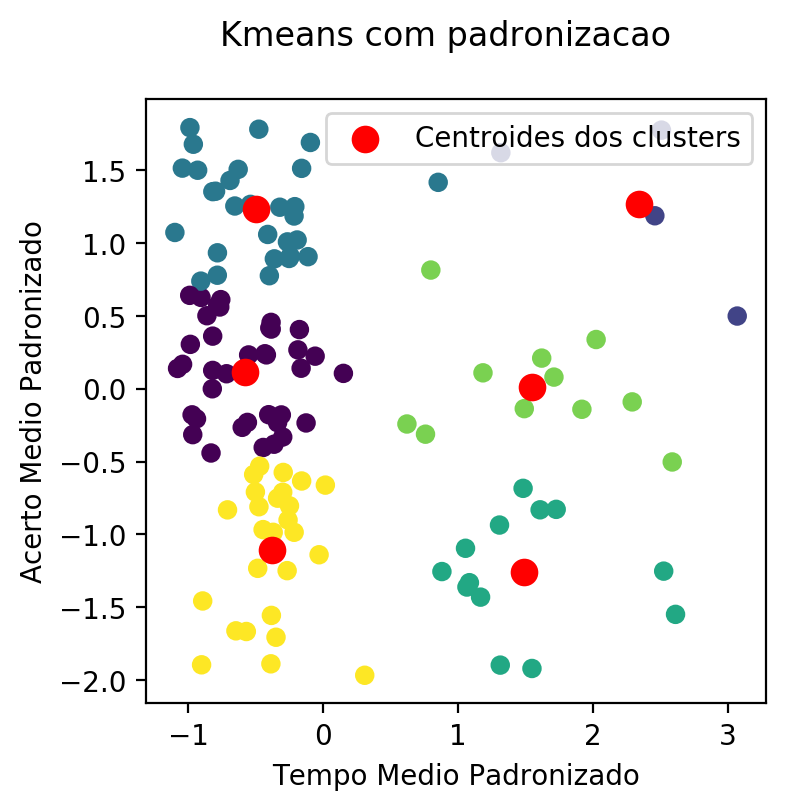

In [132]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 200)
ax.scatter(df_questoes_scaled['Tempo Medio'], df_questoes_scaled['Acerto Medio'], c=df_questoes_scaled['Grupo'], label='_nolegend_')
ax.scatter(np.transpose(kmeans2.cluster_centers_)[1],np.transpose(kmeans2.cluster_centers_)[0], c='r', s=80, label = 'Centroides dos clusters')
ax.set_xlabel('Tempo Medio Padronizado')
ax.set_ylabel('Acerto Medio Padronizado')
ax.legend()
fig.suptitle('Kmeans com padronizacao')